# Indian Startup Funding</center>

# <center style="background-color:#4267B2; color:white; padding: 10px; border-radius:5px 5px;">Basic setup and import</center>

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium import Marker
import sys

df_full = pd.read_csv('India-startup-funding-2021-full.csv')
df = df_full.copy()

# <center style="background-color:#4267B2; color:white; padding: 10px; border-radius:5px 5px;">Check statistics and data cleaning</center>

In [6]:
df.head(10)

,Month,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount ($),Stage
0,December,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000,Series B
1,December,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000,NaN
2,December,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000,Series B
3,December,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000,NaN
4,December,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000,Series A
5,December,Curefit,2016.0,Bangalore,"Health, Wellness & Fitness",Tata Digital-backed Curefit,"Mukesh Bansal, Ankit",Zomato,145000000,NaN
6,December,Pocket FM,2018.0,Bangalore,OTT,Pocket FM lets users discover and enjoy the gr...,"Rohan, Nishanth Srinivas, Prateek Dixit","Lightspeed, Times Group, Tanglin Venture Partners",22000000,Series B
7,December,CHARGE+ZONE,2018.0,Vadodara,Automotive,CHARGE+ZONE is a tech-driven EV Charging infra...,Kartikey Hariyani,Venture Catalysts,10000000,NaN
8,December,PlanetSpark,2017.0,Gurugram,Education Management,PlanetSpark is building the World Leader in Co...,"Maneesh Dhooper, Kunal Malik","Binny Bansal, Deep Kalra, Dr Ashish Gupta, Gok...",13000000,Series B
9,December,LenDenClub,2015.0,Mumbai,Financial Services,P2P lending platform delivering high returns o...,"Bhavin Patel, Dipesh Karki","Tuscan Ventures, Ohm Stock Brokers, Artha Vent...",10000000,Series A


In [7]:
df.iloc[11]

,11
Month,December
Company/Brand,AgroStar
Founded,2013.0
Headquarters,Pune
Sector,AgriTech
What it does,"AgroStar is one of India’s foremost AgTech start-ups, working on the mission of #HelpingFarmersWin."
Founder/s,"Shardul, Sitanshu Sheth"
Investor/s,"Evolvence, Hero Enterprise"
Amount ($),70000000
Stage,Series D


<div style="background-color:#cccc00; color:white; padding: 5px 5px 5px 15px; border-radius:5px 5px; font-size:15px; width:85%">(1.2) Below is data example of Amount = "ah! Ventures"</div>

In [8]:
df.iloc[551]

,551
Month,August
Company/Brand,Rocket Skills
Founded,2020.0
Headquarters,Gurugram
Sector,EdTech
What it does,Rocket Skills is the #1 Platform for learning skills which will bring a high positive impact on your business and life skills.
Founder/s,"Vibhu Bahuguna, Mohit Jain"
Investor/s,"Better Capital, First Cheque, Titan Capital"
Amount ($),200000
Stage,Pre-seed


<div style="background-color:#2d862d; color:white; padding: 5px 5px 5px 15px; border-radius:5px 5px; font-size:18px;">[2] Cleaning data</div>

In [9]:
df['Amount ($)'].loc[(df['Amount ($)'] != 'Undisclosed') & (df['Amount ($)'] != 'undisclosed')].str.isdigit().value_counts()

,count
Amount ($),
True,1056
False,10


In [11]:
junk_amount_index = []

df_digit_values = df['Amount ($)'].loc[(df['Amount ($)'] != 'Undisclosed') & (df['Amount ($)'] != 'undisclosed')].str.isdigit()

for index, data in df_digit_values.items():
    if not data:
        junk_amount_index.append(index)

In [12]:
print("{} companies before removing junk amount data".format(len(df)))

# Drop junk amount data
df = df.drop(junk_amount_index)

print("{} companies after removing junk amount data".format(len(df)))

1209 companies before removing junk amount data
1199 companies after removing junk amount data


In [13]:
ud_amount_index = []

df_undisclosed_amount_companies = df.loc[(df['Amount ($)'] == 'Undisclosed') | (df['Amount ($)'] == 'undisclosed')]

for index in df_undisclosed_amount_companies.index:
    ud_amount_index.append(index)

In [14]:
print("{} companies before removing 'Undisclosed' amount data".format(len(df)))

# Drop junk amount data
df = df.drop(ud_amount_index)

print("{} companies after removing 'Undisclosed' amount data".format(len(df)))

1199 companies before removing 'Undisclosed' amount data
1061 companies after removing 'Undisclosed' amount data


In [15]:
df = df[df['Amount ($)'].notna()]

# <center style="background-color:#4267B2; color:white; padding: 10px; border-radius:5px 5px;">EDA and Geospatial Analysis</center>

In [16]:
df_undisclosed_amount_companies.head()

,Month,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount ($),Stage
22,December,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",Undisclosed,Seed
36,December,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",Undisclosed,Seed
88,December,Karkinos Healthcare,2020.0,Mumbai,Hospital & Health Care,Medical center for treatment of complex cancer...,"R Venkataramanan, Ravi Kant",Reliance Digital Health,Undisclosed,NaN
92,December,Zorgers,2013.0,Mohali,Hospital & Health Care,Zorgers Home Healthcare is India’s most truste...,"Varun Gupta, Anil Kumar, Abhinav Gupta",Ritu Marya Family Office.,Undisclosed,NaN
93,December,BangDB,2015.0,Bangalore,Computer Software,A Converged NoSQL Data Platform for Predictive...,Sachin Sinha,Ten Innovate,Undisclosed,NaN


In [17]:
print(df_full['Month'].value_counts())

Month
September    147
July         133
August       125
June         122
October      121
December     103
March         92
April         87
January       82
November      73
May           62
February      62
Name: count, dtype: int64


In [18]:
# Convert "df" amount data into decimal/digit
df[['Amount ($)']] = df[['Amount ($)']].astype(float)

df.groupby(['Month'])['Amount ($)'].sum()

,Amount ($)
Month,
April,1.535595e+11
August,2.410020e+09
December,3.235647e+09
February,1.865060e+09
January,9.327700e+08
July,3.020000e+09
June,1.981455e+09
March,2.705575e+09
May,7.011300e+08


In [19]:
print(df_full['Headquarters'].value_counts())

Headquarters
Bangalore             426
Mumbai                203
Gurugram              155
New Delhi             144
Pune                   47
                     ... 
Gandhinagar             1
Silvassa                1
Thiruvananthapuram      1
Faridabad               1
Telangana               1
Name: count, Length: 70, dtype: int64


In [20]:
df.sort_values('Amount ($)', ascending=False)

,Month,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount ($),Stage
959,April,Alteria Capital,2018.0,Mumbai,FinTech,Alteria Capital is a Venture debt firm .,Vinod Murali,NaN,1.500000e+11,Debt
1096,February,VerSe Innovation,2007.0,Bangalore,Innovation Management,Owner of Dailyhunt App and I-Pay,Virendra Gupta,"Canaan Valley Capital, Glade Brook Capital Par...",1.000000e+09,Series H
170,November,Dream Sports,2008.0,Mumbai,Sports,Dream Sports is India’s leading sports technol...,Harsh Jain,"Falcon Edge, DST Global, D1 Capital, Redbird C...",8.400000e+08,NaN
939,April,Swiggy,2014.0,Bangalore,Food delivery,Swiggy is an on-demand food delivery platform ...,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Carmignac, Falcon Edge Capital",8.000000e+08,NaN
642,July,OYO,2013.0,Gurugram,Hospitality,OYO is a global platform that empowers entrepr...,Ritesh Agarwal,"SoftBank Vision Fund, Hindustan Media Venture",6.600000e+08,NaN
...,...,...,...,...,...,...,...,...,...,...
810,June,Nestroots,2016.0,Gurugram,Fashion,"Ottoman, Stool, Brass Kitchen Solutions, Masal...",Chhavi Singh,We Founder Circle,1.000000e+05,Seed
1087,February,Supply6,2018.0,Bangalore,Helathcare,Supply6 is a food supplement brand that claims...,"Rahul Jacob, Vaibhav Bhandari","Rohit Goutamchand, India CXO Fund",1.000000e+05,Seed
132,November,Valuationary,2020.0,Surat,E-learning,EdTech platform upskilling candidates to bag d...,"Pratik Bajaj, Kunal Shah, Mahip Gupta","Ashish Jain, Ajay Surana",1.000000e+05,Pre-seed
819,June,Knackit,2019.0,Bangalore,IT startup,Knackit is a talent sharing platform where use...,"Pranjal Kumar, Akanksha Bhardwaj",Jyoti Bansal,1.000000e+05,NaN


<div style="background-color:#cccc00; color:white; padding: 5px 5px 5px 15px; border-radius:5px 5px; font-size:15px; width:85%">Top 25 funded companies</div>

In [21]:
df_top_25_funded_companies = df.sort_values('Amount ($)', ascending=False).head(25)

In [22]:
df_top_25_funded_companies = df_top_25_funded_companies.drop([959])

Text(0, 0.5, 'Funding')

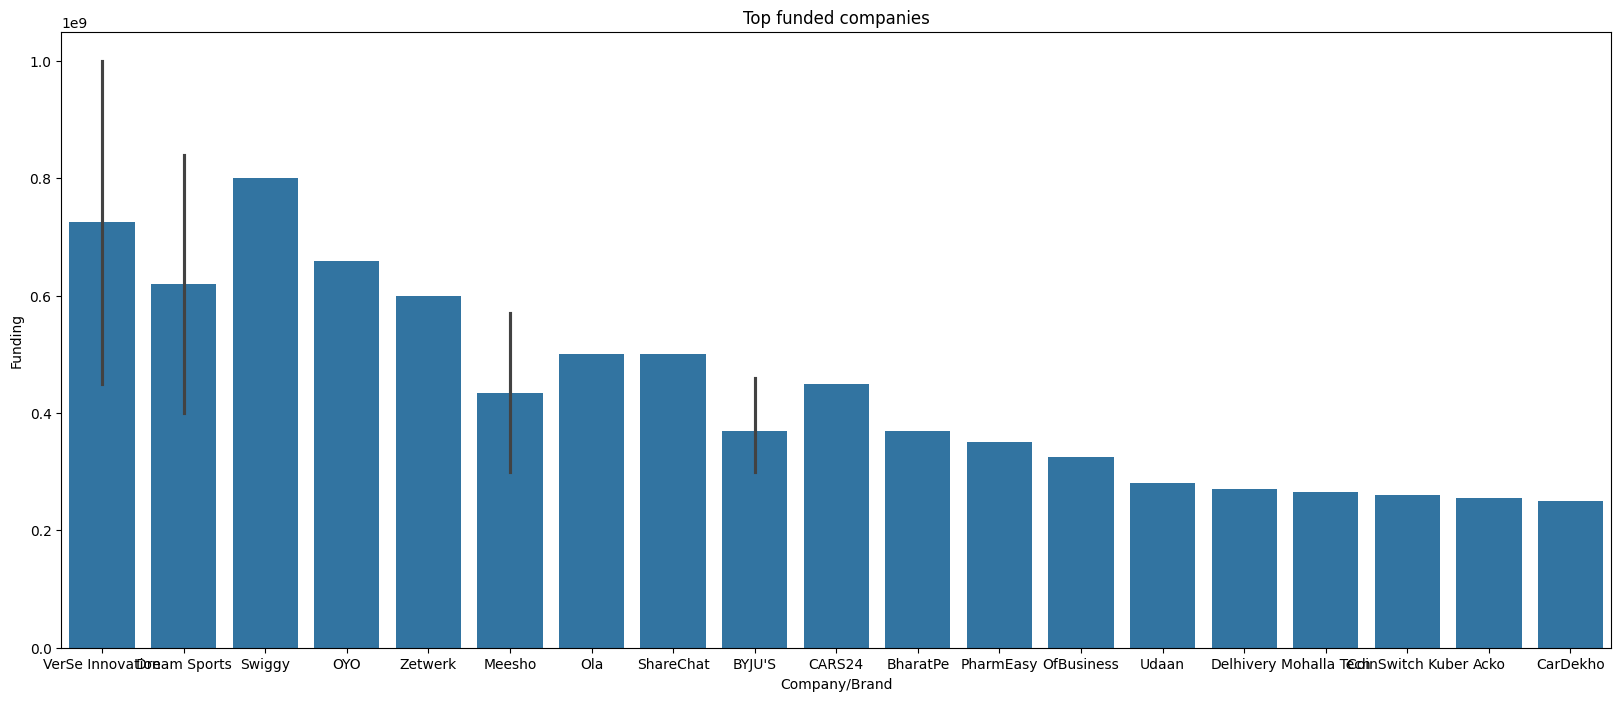

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(20,8))

# Add title
plt.title("Top funded companies")

# Preparing bar chart
sns.barplot(x=df_top_25_funded_companies['Company/Brand'], y=df_top_25_funded_companies['Amount ($)'])

# Add label for vertical axis
plt.ylabel("Funding")

<div style="background-color:#cccc00; color:white; padding: 5px 5px 5px 15px; border-radius:5px 5px; font-size:15px; width:85%">(2.2) Company count per city (Top 15 count)</div>

In [24]:
df_comp_count_per_city = df_full['Headquarters'].value_counts().rename_axis('city').to_frame('count').head(15)

print(df_comp_count_per_city)

            count
city             
Bangalore     426
Mumbai        203
Gurugram      155
New Delhi     144
Pune           47
Chennai        40
Noida          34
Hyderabad      34
Jaipur         11
Ahmedabad      11
Thane           7
Gurgaon         7
Ahmadabad       6
Chandigarh      5
Kolkata         5


Text(0, 0.5, 'Company Count')

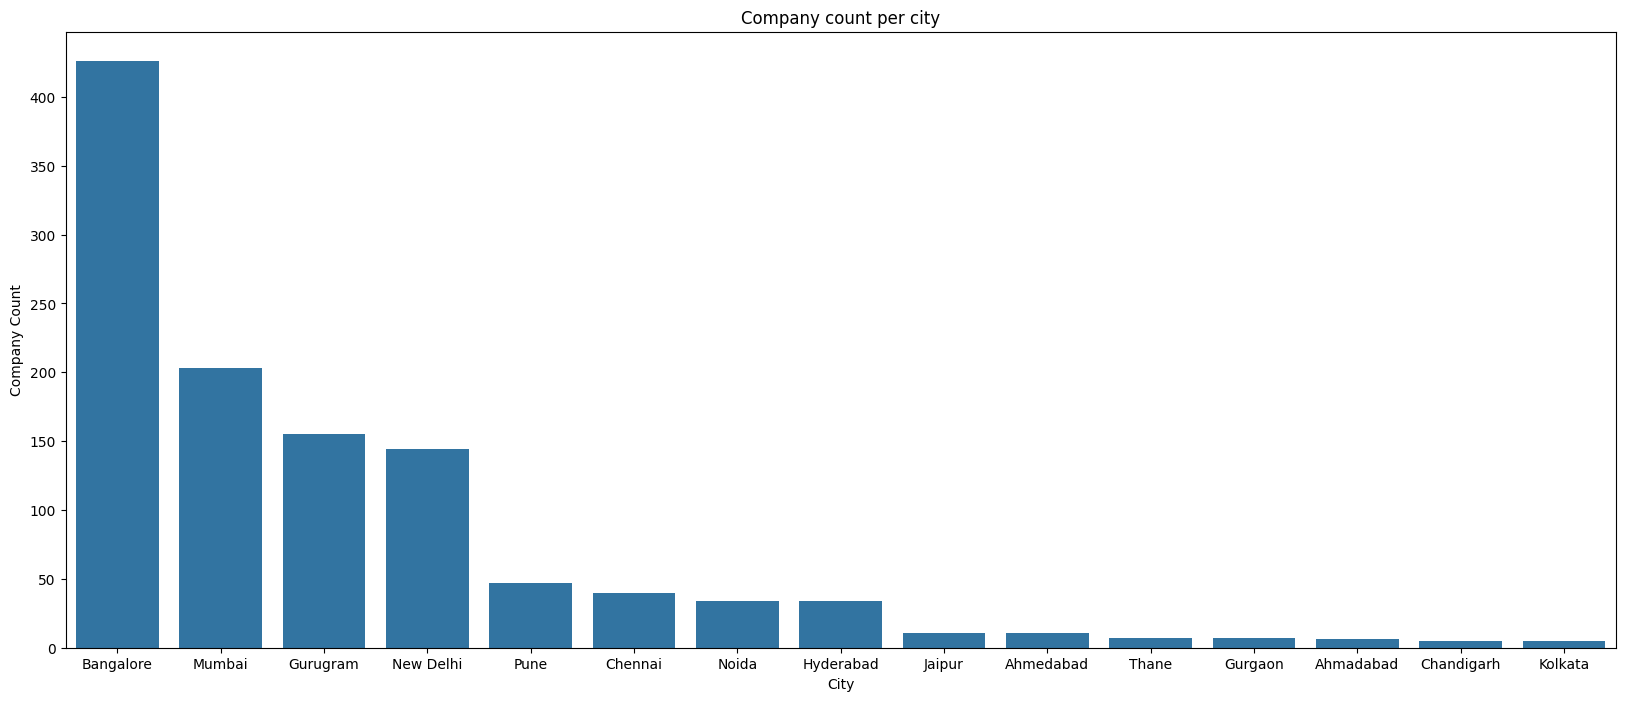

In [25]:
# Set the width and height of the figure
plt.figure(figsize=(20,8))

# Add title
plt.title("Company count per city")

# Preparing bar chart
sns.barplot(x=df_comp_count_per_city.index, y=df_comp_count_per_city['count'])

# Add label axis
plt.xlabel("City")
plt.ylabel("Company Count")

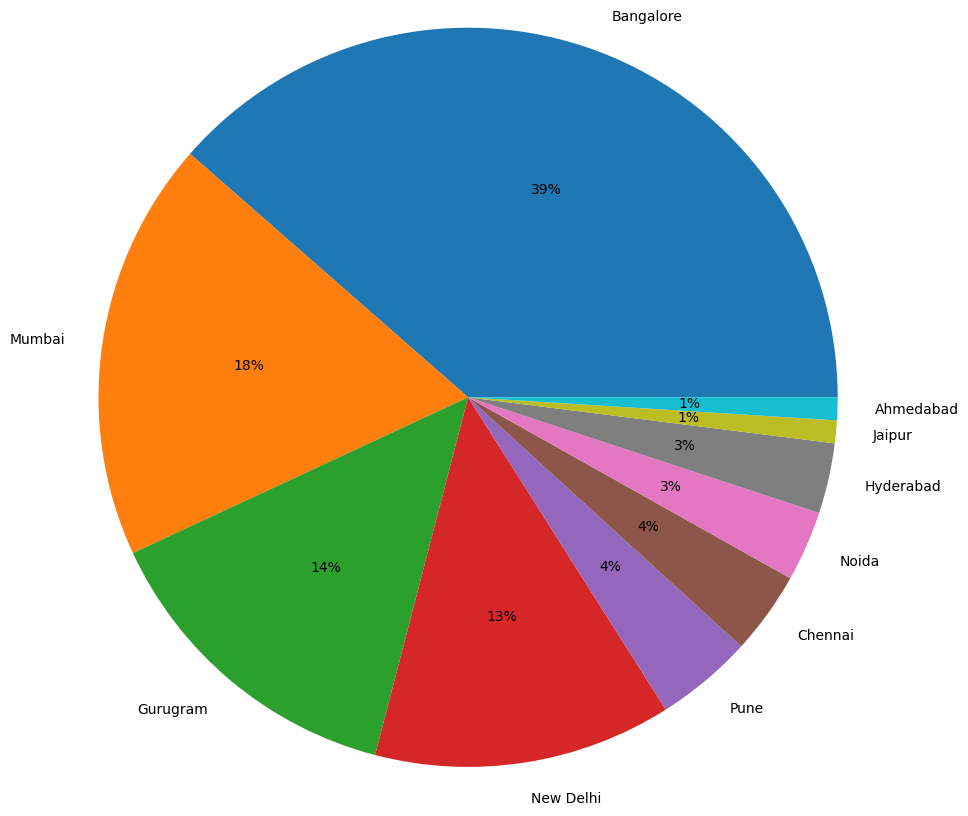

In [26]:
df_comp_count_per_city_10 = df_comp_count_per_city.head(10)
plt.pie(df_comp_count_per_city_10['count'], labels = df_comp_count_per_city_10.index, autopct='%.0f%%', radius=2.5)
plt.show()

<div style="background-color:#f2f2f2; color:#47476b; padding: 8px; border-radius:10px 10px; font-size:18px; width:90%">
<strong>Banglore</strong> city have highest count of funded companies
</div>

In [27]:
df_top_city_10 = df_full['Headquarters'].value_counts().rename_axis('city').reset_index(name='count').head(10)

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="kaggle_learn")

def my_geocoder(row):
    try:
        point = geolocator.geocode(row).point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
        #return [point.latitude, point.longitude]
    except:
        return None

df_top_city_10[['Latitude', 'Longitude']] = df_top_city_10.apply(lambda x: my_geocoder(x['city']), axis=1)

print(df_top_city_10)

        city  count   Latitude  Longitude
0  Bangalore    426  12.988157  77.622600
1     Mumbai    203  19.081577  72.886628
2   Gurugram    155  28.464615  77.029919
3  New Delhi    144  28.613895  77.209006
4       Pune     47  18.521428  73.854454
5    Chennai     40  13.083694  80.270186
6      Noida     34  28.570633  77.327215
7  Hyderabad     34  17.360589  78.474061
8     Jaipur     11  26.915458  75.818982
9  Ahmedabad     11  23.021537  72.580057


In [28]:
# Create a map
map = folium.Map(location=[17, 78], tiles='openstreetmap', zoom_start=4)

# Add points to the map
for idx, row in df_top_city_10.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['city']).add_to(map)

# Display the map
map

<div style="background-color:#cccc00; color:white; padding: 5px 5px 5px 15px; border-radius:5px 5px; font-size:15px; width:85%">(2.3) Company count per month</div>

In [29]:
df_comp_count_per_month = df_full['Month'].value_counts().rename_axis('month').to_frame('count')

print(df_comp_count_per_month)

           count
month           
September    147
July         133
August       125
June         122
October      121
December     103
March         92
April         87
January       82
November      73
May           62
February      62


Text(0, 0.5, 'Company Count')

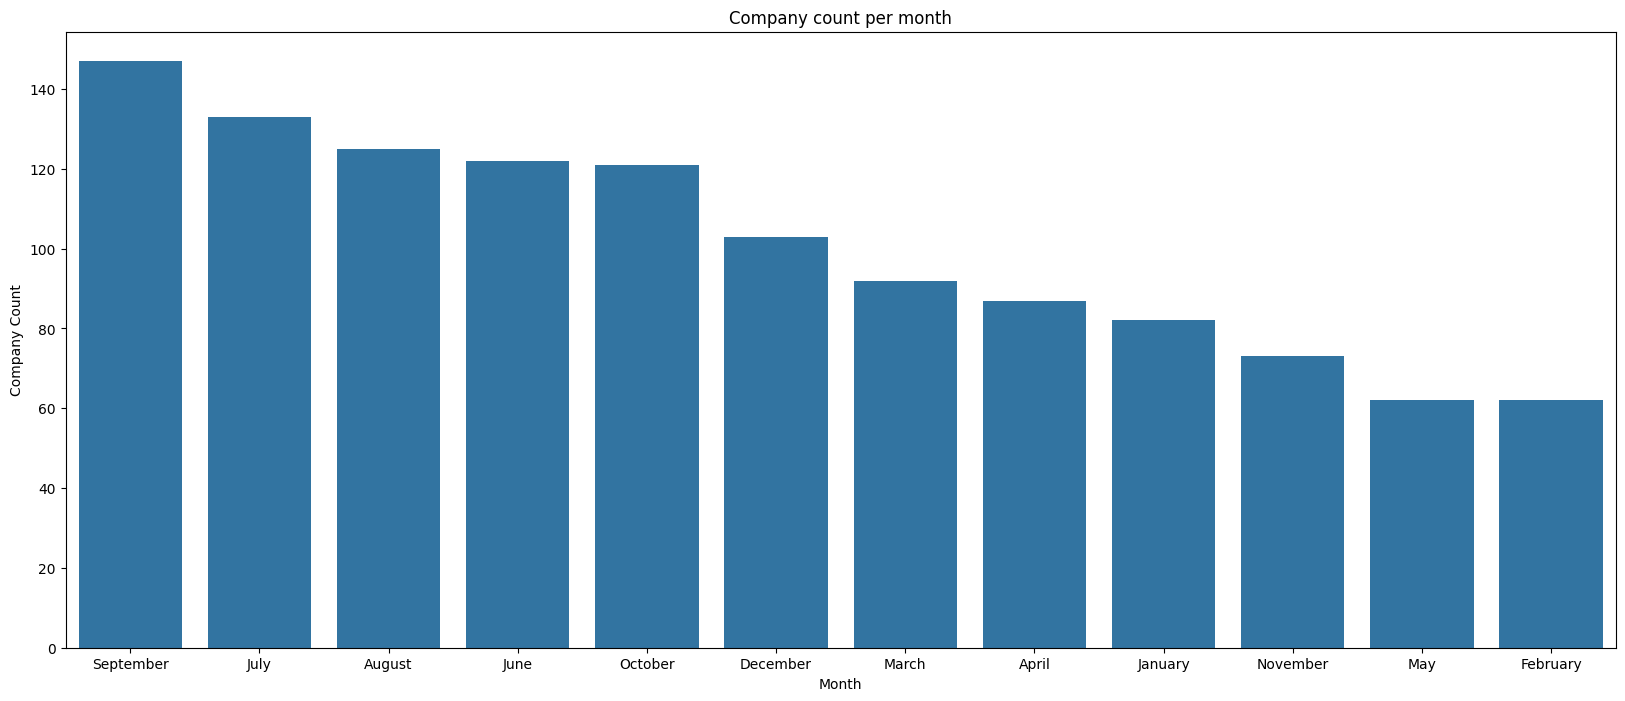

In [34]:
# Set the width and height of the figure
plt.figure(figsize=(20,8))

# Add title
plt.title("Company count per month")

# Preparing bar chart
sns.barplot(x=df_comp_count_per_month.index, y=df_comp_count_per_month['count'])

# Add label axis
plt.xlabel("Month")
plt.ylabel("Company Count")

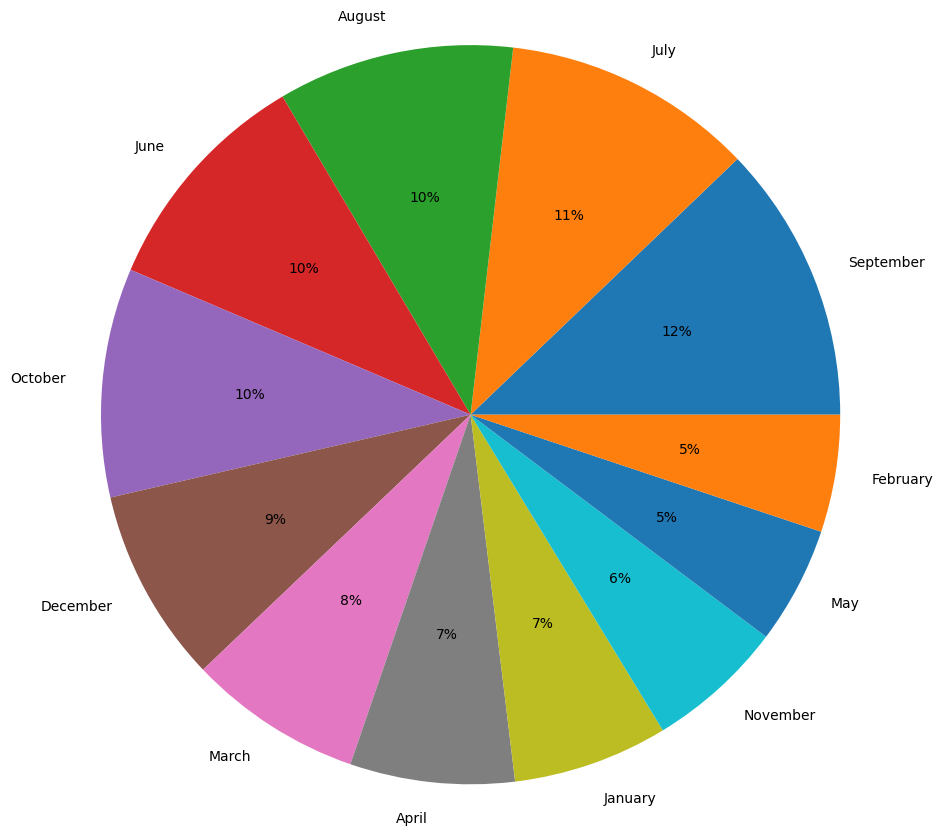

In [31]:
plt.pie(df_comp_count_per_month['count'], labels = df_comp_count_per_month.index, autopct='%.0f%%', radius=2.5)
plt.show()

<div style="background-color:#f2f2f2; color:#47476b; padding: 8px; border-radius:10px 10px; font-size:18px; width:90%">
<strong>September</strong> have highest count of funding while <strong>February and May</strong> have lowest count of funding
</div>

# <center style="color:white; padding: 10px; border-radius:5px 5px; background-image: url(https://i.imgur.com/0fetaJr.png);">Thank You</center>